<a href="https://colab.research.google.com/github/krishna324-art/Heart-Disease-prediction-using-decision-tree/blob/main/decision_tree_from_sctach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
import pandas as pd
df=pd.read_csv('/content/processed.cleveland.data',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#identifying the missing data
#data imputation
df.dtypes


,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
#print uniquq values
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
#dealing with missing data
#how many rows hav4 missing value
len(df.loc[(df['ca']=='?')
    |
    (df['thal']=='?')])

6

In [ ]:
#print out the rows that contain missing values
(df.loc[(df['ca']=='?')
    |
    (df['thal']=='?')])

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

303

In [ ]:
#total data 303-6=297
#so remove it
df_no_missing=df.loc[(df['ca']!='?')
                     & (df['thal']!='?')]


In [ ]:
len(df_no_missing)

297

In [ ]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [ ]:
#splittig the data into dependent and independate variable
X=df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y=df_no_missing['hd'].copy()
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


In [ ]:
#one hot encoding
#done for categorical variables
#encoding them as vector
X.dtypes



,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [ ]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [ ]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_index=y>0#get index for each non zero value in y
y[y_not_zero_index]=1 #set eacch non -zero value in y to 1
y.unique()


array([0, 1])

In [ ]:
#building the classifcation tree
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
#create a decision tree and fit it to the training data
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No Hd'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No Hd'),
 Text(0.4525862068965517, 0.9166666666666667, 'True  '),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No Hd'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No Hd'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No Hd'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No Hd'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No Hd'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No Hd'

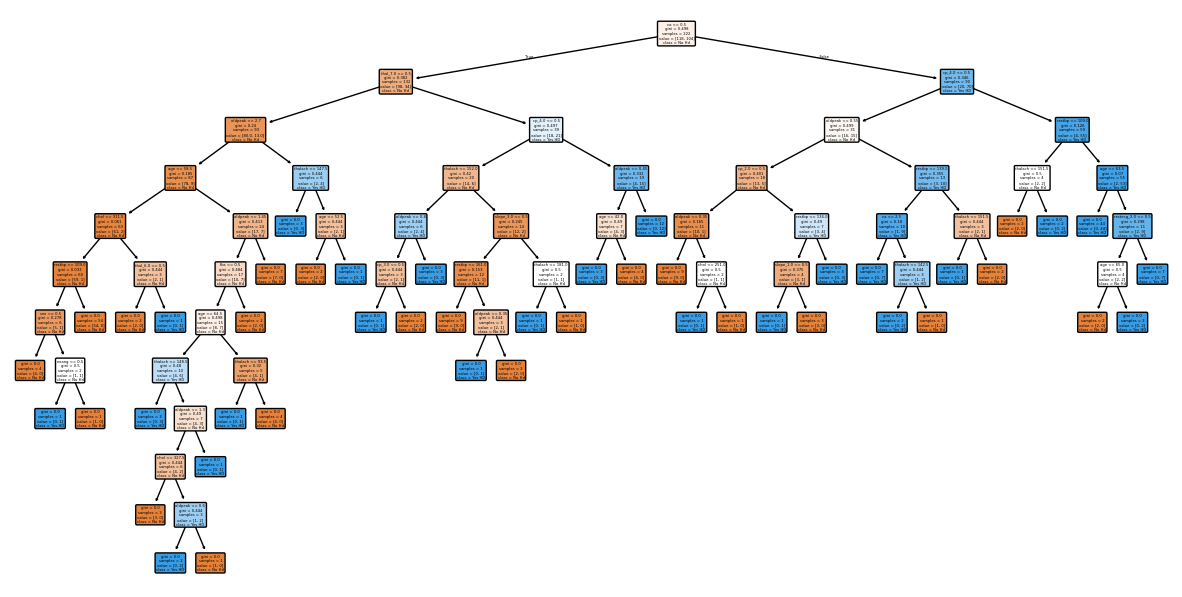

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No Hd","Yes HD"],feature_names=X_encoded.columns)

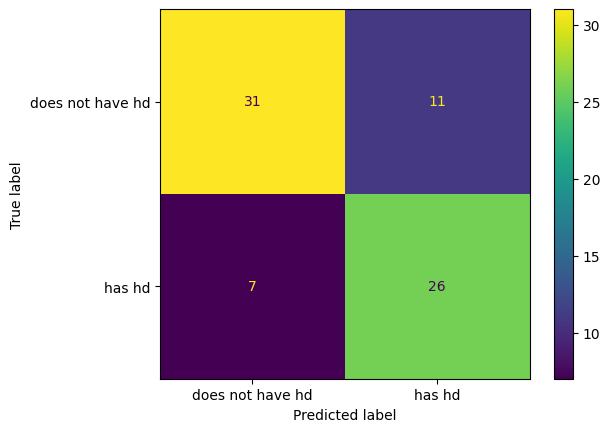

In [ ]:
#plot the decsiion tree on testing data
ConfusionMatrixDisplay.from_estimator(clf_dt,X_test,y_test,display_labels=["does not have hd","has hd"])
plt.show()

in confusion matrix we see that 31+11=42 people that did not have heart disease were correctly classified and the &+26=33 people that have heart disease,26(79%) were coreectly classified

In [ ]:
#prune the tree
#cost complexity pruning
#ccp_alpha
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)#dteermine values fr alpha
ccp_alphas=path.ccp_alphas#extraxct diffremnt values for alpha
ccp_alphas=ccp_alphas[:-1]#exclude the maximum value for alpha

clf_dts = [] # Initialize clf_dts as an empty list
#now create one decision tree per value for alpha and stpre it in the array
for cc_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=cc_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)

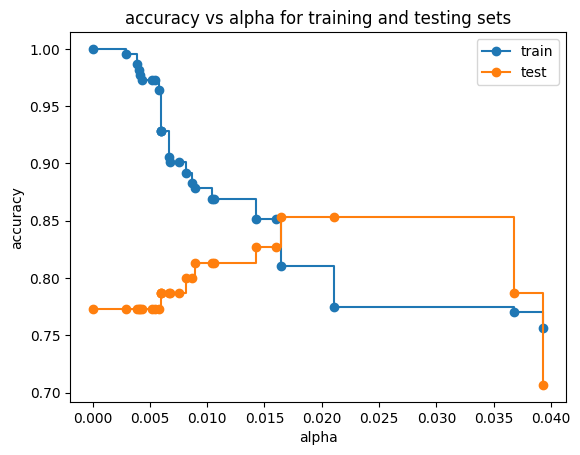

In [ ]:
train_scores=[clf_dt.score(X_train,y_train)for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test)for clf_dt in clf_dts]
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

here we determined that alpha is 0.016


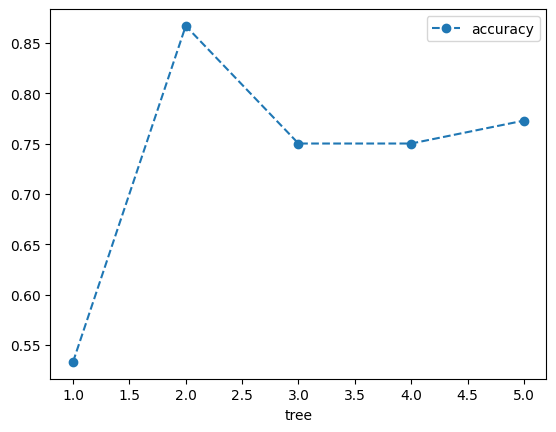

In [ ]:
#cross validation data
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)#create tree with ccp alpha
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)

# Create a DataFrame from the cross-validation scores
df_scores = pd.DataFrame({'tree': range(1, len(scores) + 1), 'accuracy': scores})

# Plot the accuracy scores
df_scores.plot(x='tree', y='accuracy', marker='o', linestyle='--')
plt.show()

graph above shows that using dif training and testing data with the same alpha resulsts in diff accuracy suggesting that alpha is sensitive to the dataset


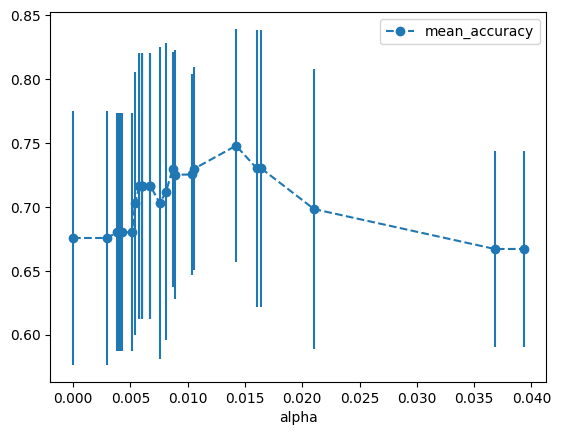

In [ ]:
#storing the result of each validation accuracy
import numpy as np
alpha_loop_values=[ ]
for ccp_alpha in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.show()

In [ ]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha'].iloc[0]
ideal_ccp_alpha

np.float64(0.014224751066856332)

In [ ]:
#testing the final decision tree with best alpha

clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

<Axes: xlabel='alpha'>

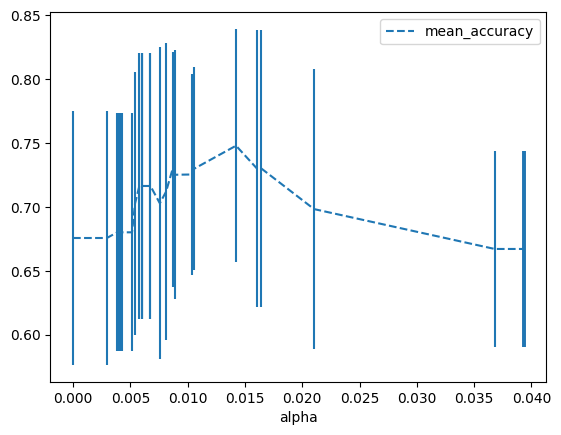

In [ ]:
#alpha_loop_values=[ ]
for ccp_values in ccp_alphas:
  clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',linestyle='--')

In [ ]:
#evaluating the decsision tree
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,y_train)

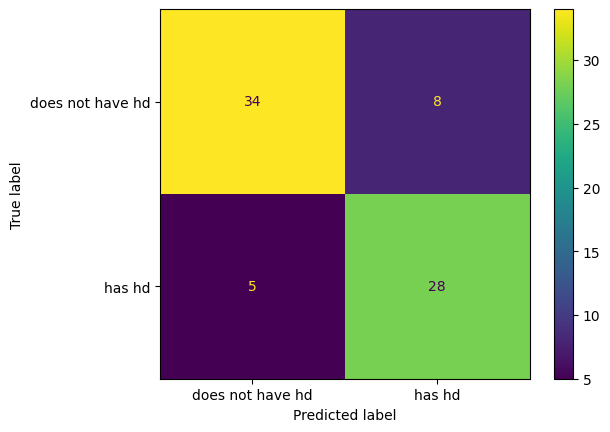

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,X_test,y_test,display_labels=["does not have hd","has hd"])

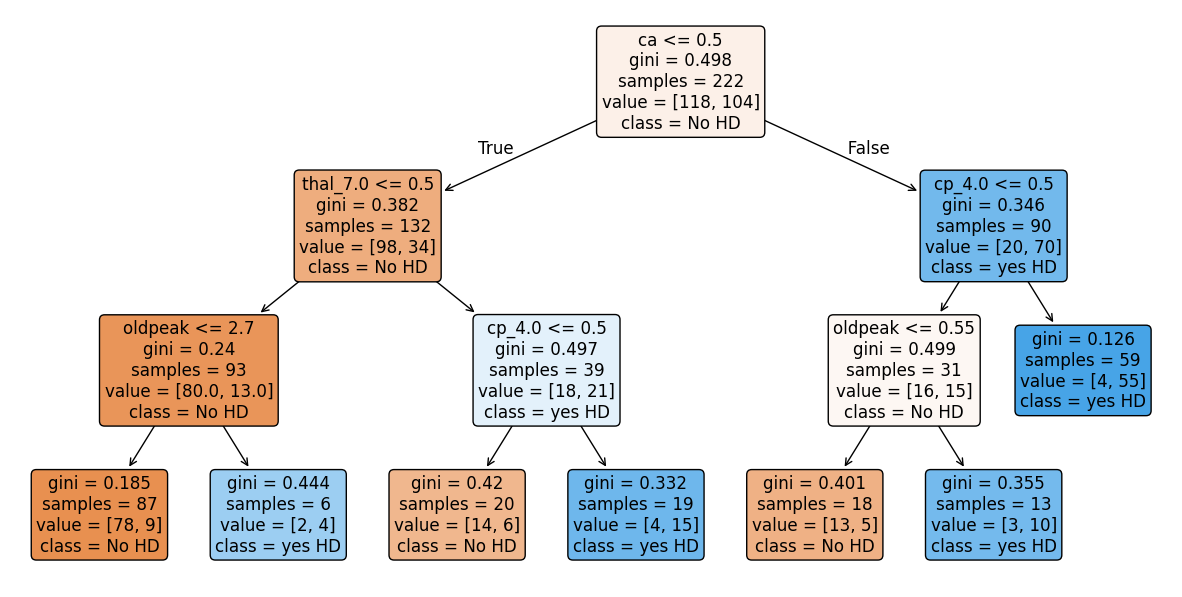

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","yes HD"],
feature_names=X_encoded.columns);